In [25]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### 패션 분류 실습
1. matplotlib를 이용해 데이터 시각화
2. 학습을 위해서 정답데이터(훈련, 테스트)를 확률정보 변경-원핫인코딩
3. keras 를 이용해서 CNN 모델 구성
4. 학습 및 평가 (검증 셋 분리핟록 설정)
5. history 그래프로 그리기

In [11]:
from matplotlib import pyplot as plt

digit = X_train[100]
label = y_train[100]

### 1. 데이터 시각화

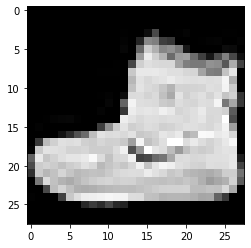

In [31]:
#
plt.imshow(X_train[0], cmap='gray')

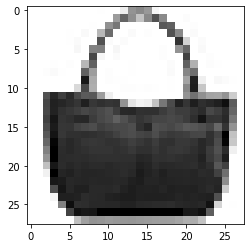

In [14]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

### 전처리

In [19]:
train_images = X_train.reshape(60000, 28 * 28)
train_images = X_train.astype('float32') / 255

test_images = X_test.reshape(10000, 28 * 28)
test_images = X_test.astype('float32') / 255

### 2. 정답데이터 원핫인코딩

In [32]:
y_test # 이 정보를 원핫인코딩 한다

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [34]:
#
y_train_one = to_categorical(y_train)
y_train_one[:3] # 3줄까지만 본다
# 각 아이템의 확률을 이야기 한다

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
from keras.utils import to_categorical

train_labels_one = to_categorical(y_train)
test_labels_one = to_categorical(y_test)

Using TensorFlow backend.


In [16]:
train_labels_one.shape, test_labels_one.shape

((60000, 10), (10000, 10))

### keras 를 이용해서 CNN 모델 구성

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
train_images = train_images.reshape(60000, 28, 28, 1)

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [23]:
#test data reshape
test_images = test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

In [26]:
cnn_model = Sequential()
# # 1. feature extractor => 특징 추출부
cnn_model.add(Conv2D(input_shape = (28, 28, 1), # 입력 데이터의 shape 정보
                    filters = 3, # number of magnifying glasses(MG)
                    # thus, the more you bring MG, the more diverse features will be extracted
                    kernel_size = (3, 3), # the size of MG  : 3 * 3 = 9
                    activation = "relu"
                    ))
cnn_model.add(MaxPool2D())


cnn_model.add(Conv2D(filters = 3, # number of magnifying glasses(MG)
                    # thus, the more you bring MG, the more diverse features will be extracted
                    kernel_size = (3, 3), # the size of MG  : 3 * 3 = 9
                    activation = "relu"
                    ))
cnn_model.add(MaxPool2D())

# 2. classifier => MLP (추출된 특징으로 분류)
cnn_model.add(Flatten()) # layer that makes data with 1 dimension (simplication)
cnn_model.add(Dense(512, activation = "relu"))
cnn_model.add(Dense(10, activation = "softmax"))

### 모델학습

In [27]:
cnn_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [28]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 3)         84        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 3)           0         
_________________________________________________________________
flatten (Flatten)            (None, 75)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               38912     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [29]:
cnn_model.fit(train_images, train_labels_one, epochs=15, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 7s 167us/sample - loss: 0.6661 - accuracy: 0.7593 - val_loss: 0.5413 - val_accuracy: 0.7980
Epoch 2/15
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4972 - accuracy: 0.8178 - val_loss: 0.5041 - val_accuracy: 0.8124
Epoch 3/15
42000/42000 [==============================] - 4s 86us/sample - loss: 0.4493 - accuracy: 0.8321 - val_loss: 0.4271 - val_accuracy: 0.8465
Epoch 4/15
42000/42000 [==============================] - 4s 88us/sample - loss: 0.4157 - accuracy: 0.8463 - val_loss: 0.4150 - val_accuracy: 0.8504
Epoch 5/15
42000/42000 [==============================] - 3s 82us/sample - loss: 0.3878 - accuracy: 0.8575 - val_loss: 0.4016 - val_accuracy: 0.8548
Epoch 6/15
42000/42000 [==============================] - 3s 79us/sample - loss: 0.3693 - accuracy: 0.8620 - val_loss: 0.3805 - val_accuracy: 0.8649
Epoch 7/15
42000/42000 [==============================]

### 모델 평가

In [30]:
cnn_model.evaluate(test_images, test_labels_one)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3816 - accuracy: 0.8709


[0.3816235662460327, 0.8709]